In [156]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

model = VGG16(weights='imagenet', include_top=False)
model.summary()

# img_path = '/content/3D-2D.png'
# img = image.load_img(img_path, target_size=(224, 224))
# img_data = image.img_to_array(img)
# img_data = np.expand_dims(img_data, axis=0)
# img_data = preprocess_input(img_data)

# vgg16_feature = model.predict(img_data)
# vgg16_feature_np = np.array(vgg16_feature)
# vgg16_feature_np.flatten().shape
# print vgg16_feature.shape


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [126]:
img_d

In [127]:
# vgg16_feature_np = np.array(vgg16_feature)
# vgg16_feature_np.flatten().shape

In [128]:
import cv2
import numpy as np
import os


In [129]:
cap = cv2.VideoCapture("/content/LOG_868371_1620278801308.mp4")
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) 


In [130]:
length

1035

In [131]:
print(length//64) 

16


In [132]:
gap = (length//64)

In [133]:
gap = gap//2

In [134]:
count = 0
features = {}
while cap.isOpened():
  ret, frame = cap.read()
  if ret:
    cv2.imwrite('frame{:d}.jpg'.format(count),frame)
    img_path = 'frame'+str(count)+'.jpg'
    # print(img_path)
    img = image.load_img(img_path, target_size=(224, 224))
    # print(img)
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    features['frame'+str(count)] = vgg16_feature_np.flatten()
    count += gap
    cap.set(1, count)

  else:
    cap.release()
    break
  

In [135]:
print(count)

1040


In [136]:
from numpy import dot
from numpy.linalg import norm
def cosine_similarity(a,b):
  cos_sim = dot(a, b)/(norm(a)*norm(b))
  return cos_sim

In [137]:
# features

In [138]:
cosine_similarity(features['frame0'],features['frame1008'])

0.63802993

In [139]:
DIM = len(features.keys())

In [140]:
b = np.zeros((DIM,DIM))

In [141]:
len(features.keys())

130

In [142]:
cnt = 1 
for i in range(len(features.keys())):
  for k in range(cnt):
    b[i,k] = cosine_similarity(features[list(features.keys())[i]], features[list(features.keys())[k]])
    b[k,i] = cosine_similarity(features[list(features.keys())[i]], features[list(features.keys())[k]])
    #b[64-i,k] = b[i,k]
    
  cnt = cnt +1



In [143]:
import pandas as pd
ss_matrix = pd.DataFrame(b)
ss_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
0,1.000000,0.946921,0.910035,0.851556,0.819290,0.792250,0.814892,0.828496,0.824762,0.768909,0.833250,0.831686,0.820476,0.749175,0.686840,0.642994,0.644629,0.649232,0.644915,0.645962,0.655935,0.667007,0.687009,0.630107,0.667211,0.638992,0.661456,0.669645,0.625578,0.659391,0.650192,0.663624,0.679635,0.611883,0.666641,0.651955,0.663779,0.650529,0.613687,0.677178,...,0.674820,0.652148,0.661765,0.654076,0.612598,0.660168,0.652470,0.679051,0.669528,0.676421,0.662324,0.668893,0.677226,0.664922,0.677212,0.666446,0.645565,0.657874,0.657357,0.658481,0.638738,0.687780,0.662367,0.673357,0.649245,0.649402,0.657931,0.659020,0.673259,0.662956,0.655594,0.638232,0.628708,0.627614,0.638143,0.637643,0.638030,0.635781,0.637629,0.752252
1,0.946921,1.000000,0.959296,0.902520,0.869009,0.840591,0.854341,0.866894,0.873891,0.812555,0.876535,0.874548,0.858924,0.766187,0.694627,0.651103,0.650319,0.655914,0.648554,0.653012,0.662873,0.675721,0.700808,0.644675,0.674788,0.650247,0.665430,0.689041,0.639298,0.675323,0.660522,0.666793,0.695899,0.622604,0.675039,0.659412,0.668250,0.669304,0.624755,0.686731,...,0.684387,0.662250,0.669601,0.671121,0.623051,0.673667,0.660599,0.685662,0.679257,0.689764,0.671674,0.679328,0.682183,0.674444,0.688194,0.673631,0.654273,0.662887,0.671249,0.670048,0.643961,0.696309,0.669935,0.689064,0.662326,0.655353,0.670209,0.663750,0.683032,0.673993,0.662943,0.645396,0.634225,0.633751,0.643842,0.646019,0.644399,0.640592,0.642333,0.772670
2,0.910035,0.959296,1.000000,0.920406,0.894268,0.859135,0.873023,0.890671,0.897861,0.833230,0.901231,0.901908,0.889042,0.805727,0.734897,0.685998,0.683680,0.689817,0.683332,0.688196,0.699897,0.711609,0.735845,0.676603,0.714231,0.680869,0.698034,0.728541,0.664720,0.712474,0.691121,0.699737,0.736483,0.645567,0.711809,0.686434,0.701791,0.710813,0.653171,0.721290,...,0.717227,0.689733,0.701218,0.710770,0.645436,0.707909,0.691824,0.723580,0.714961,0.715458,0.709058,0.709714,0.720818,0.709117,0.714912,0.710176,0.685319,0.702686,0.703558,0.695545,0.671095,0.728510,0.708344,0.723309,0.687965,0.687926,0.702151,0.700693,0.713530,0.702587,0.700457,0.671578,0.664899,0.664680,0.677498,0.679045,0.678794,0.675050,0.673898,0.812225
3,0.851556,0.902520,0.920406,1.000000,0.947878,0.900279,0.917928,0.938097,0.943758,0.877654,0.947503,0.941737,0.935095,0.831943,0.747666,0.694786,0.692015,0.696113,0.690296,0.695121,0.707302,0.732231,0.760714,0.695075,0.728326,0.695667,0.716819,0.749108,0.684413,0.730158,0.705900,0.716843,0.758852,0.664775,0.728715,0.700876,0.719664,0.735013,0.674089,0.738781,...,0.727513,0.699275,0.716513,0.731502,0.660122,0.716641,0.704972,0.738839,0.734995,0.731731,0.721561,0.718982,0.732108,0.729869,0.731904,0.718762,0.698232,0.724896,0.725346,0.711855,0.682075,0.742882,0.722716,0.743960,0.705380,0.697355,0.720228,0.721920,0.732759,0.716775,0.713831,0.681862,0.674810,0.674542,0.687853,0.686058,0.684378,0.686114,0.689468,0.833472
4,0.819290,0.869009,0.894268,0.947878,1.000000,0.922088,0.936893,0.944709,0.955572,0.902238,0.960558,0.959057,0.947988,0.847541,0.766021,0.715655,0.714933,0.720417,0.711169,0.719619,0.730779,0.753196,0.777955,0.710489,0.751169,0.712697,0.728439,0.765111,0.694572,0.745214,0.716253,0.724807,0.768916,0.672560,0.742125,0.711848,0.729036,0.748357,0.687084,0.756716,...,0.741760,0.713311,0.727611,0.747737,0.673843,0.732505,0.718711,0.751502,0.752740,0.743350,0.739026,0.730688,0.748489,0.745104,0.744611,0.735231,0.708653,0.740300,0.743204,0.729477,0.696390,0.755598,0.741257,0.761640,0.723499,0.714390,0.732964,0.738242,0.750273,0.737356,0.730097,0.703487,0.692316,0.694188,0.706474,0.706803,0.705486,0.703733,0.709778,0.849658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [144]:
b[b<0.92] = 0

In [145]:
c =pd.DataFrame(b)

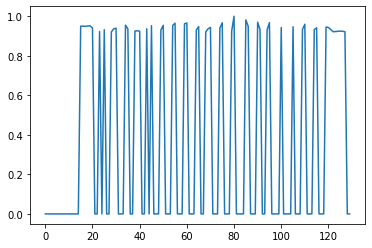

In [151]:
plt.plot(c.iloc[80])

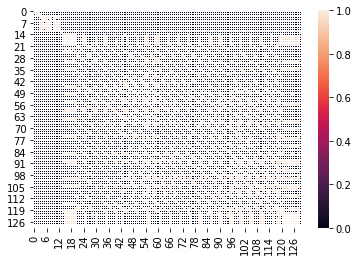

In [147]:
import seaborn as sns
import matplotlib.pylab as plt


ax = sns.heatmap(b, linewidth=0.009)
plt.show()

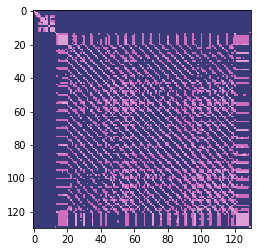

In [148]:
plt.imshow(b, cmap='tab20b', interpolation='nearest')
plt.show()

In [149]:
list(features.keys())[2]

'frame16'

In [150]:
len(features.keys())

130